# 1. Установка зависимостей.

Проверка виртуальной среды

In [1]:
# import sys
# print(sys.version)
# print(sys.base_prefix)

Список модулей, установленных в виртуальной среде

In [2]:
# print('\n'.join(sys.modules.keys()))

Установка torch

In [3]:
# !pip3 install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Клонирование репозитория с GitHub и установка необходимых модулей

In [4]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# %pip install -qr requirements.txt

# 2. Загрузка обученной модели.

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [28]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Рустам/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-23 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
#model

In [8]:
img = 'https://идея-малого-бизнеса.рф/wp-content/uploads/2015/01/850_aa28376b3be2345066344605857c00c0.jpg'

results = model(img)
results.print()

image 1/1: 565x849 1 person, 1 tie, 1 cell phone
Speed: 176.3ms pre-process, 61.5ms inference, 18.4ms NMS per image at shape (1, 3, 448, 640)


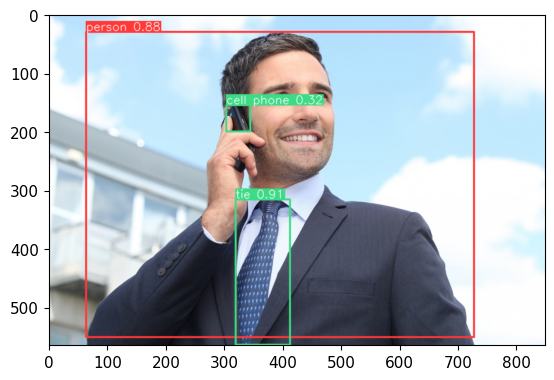

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 3. Обнаружение объектов в реальном времени.

Попытка подключения GPU

In [10]:
#conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
#python3 -m pip install tensorflow

#import tensorflow as tf

#print('CUDA available' if tf.config.list_physical_devices('GPU') else 'CUDA not available')

Основной код

In [11]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# 4. Обучение своей модели.

In [12]:
import uuid
import os
import time

In [53]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

Создание датасета с изображениями для обучения

In [56]:
# cap = cv2.VideoCapture(0)q
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)
    
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
        
#         ret, frame = cap.read()
    
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
#         cv2.imwrite(imgname, frame)
#         cv2.imshow('Image Collection', frame)
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()

Скачивание инструмента для разметки

In [15]:
# !git clone https://github.com/tzutalin/labelImg

Отладка

In [26]:
# !echo %cd%

C:\Users\ђгбв ¬\Desktop\ѓ« ў­ п Ї ЇЄ \“зсЎ \Ђ­ Є®­¤ \YOLOv5


In [17]:
# !cd C:\Users\Рустам\Desktop\Главная папка\Учёба\Анаконда\YOLOv5

Установка библиотеки PyQt для отрисовки форм и дополнительных ресурсов

In [18]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Запуск инструмента разметки

In [57]:
!cd C:\Users\Рустам\Desktop\Главная папка\Учёба\Анаконда\YOLOv5\labelImg & python labelImg.py

[('awake', [(255, 33), (435, 33), (435, 313), (255, 313)], None, None, False)]
[('awake', [(199, 30), (406, 30), (406, 342), (199, 342)], None, None, False)]
[('awake', [(243, 36), (444, 36), (444, 346), (243, 346)], None, None, False)]
Cancel creation.
Image:C:\Users\Рустам\Desktop\Главная папка\Учёба\Анаконда\YOLOv5\data\images\awake.b1ad5ebc-4c8a-11ed-bf08-d8bbc124efe1 — копия.jpg -> Annotation:C:/Users/Рустам/Desktop/Главная папка/Учёба/Анаконда/YOLOv5/data/labels\awake.b1ad5ebc-4c8a-11ed-bf08-d8bbc124efe1 — копия.txt
[('awake', [(243, 36), (444, 36), (444, 346), (243, 346)], None, None, False)]
[('awake', [(226, 1), (441, 1), (441, 289), (226, 289)], None, None, False)]
[('awake', [(243, 36), (444, 36), (444, 346), (243, 346)], None, None, False)]
[('awake', [(226, 1), (441, 1), (441, 289), (226, 289)], None, None, False)]
Image:C:\Users\Рустам\Desktop\Главная папка\Учёба\Анаконда\YOLOv5\data\images\awake.b7bf73ff-4c8a-11ed-a66f-d8bbc124efe1 — копия.jpg -> Annotation:C:/Users/Руст

In [20]:
# cd yolov5 && 
# Приставка
# вот отсюда
# V

In [58]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   beb9555..4ed1f7b  exp8       -> origin/exp8
github:  YOLOv5 is out of date by 14 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to 'C:\Users\Р СѓСЃС‚Р°Рј\Desktop\Р“Р»Р°РІРЅР°СЏ': No such file or directory
YOLOv5  2022-10-1 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144

Проверка доступности GPU

In [23]:
print('Is CUDA avalible: {}'.format(torch.cuda.is_available()))
print('Device count:\t{}'.format(torch.cuda.device_count()))
print('Current device:\t{}'.format(torch.cuda.current_device()))
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Is CUDA avalible: True
Device count:	1
Current device:	0
NVIDIA GeForce RTX 3060 Laptop GPU


# 5. Загрузка и проверка модели.

In [59]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Рустам/.cache\torch\hub\master.zip
YOLOv5  2022-10-15 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [65]:
img = os.path.join('data', 'images', 'awake.be62ef44-3ce7-11ed-8cc4-7c50793ce302.jpg')
img_drowsy = os.path.join('data', 'images', 'drowsy.d86a5067-3ce7-11ed-b4d4-7c50793ce302.jpg')

In [66]:
results = model(img)
results_2 = model(img_drowsy)

In [67]:
results.print()
results_2.print()

image 1/1: 480x640 1 awake
Speed: 6.0ms pre-process, 63.9ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 drowsy
Speed: 4.0ms pre-process, 63.8ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


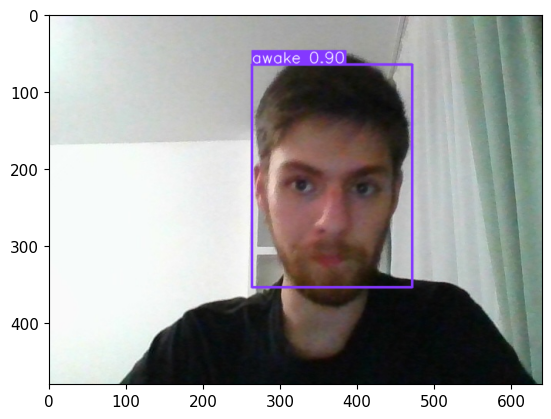

In [68]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

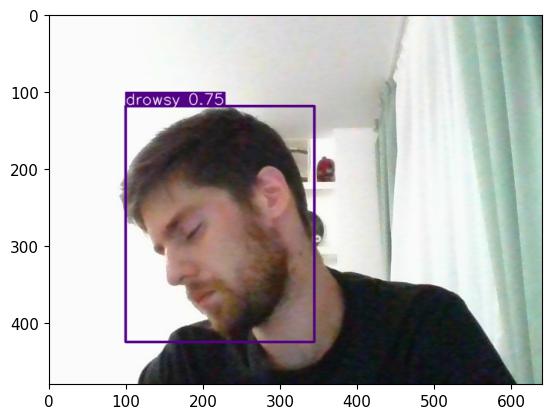

In [69]:
%matplotlib inline
plt.imshow(np.squeeze(results_2.render()))
plt.show()

Работа в реальном времени

In [64]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()